##  Author : Riasad Alvi
### 13 Jan 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate dataset
X, y = make_classification(
    n_samples=100,        # Number of samples
    n_features=2,         # Number of features
    n_informative=2,      # Number of informative features
    n_redundant=0,        # No redundant features
    n_clusters_per_class=1,
    flip_y=0,             # No label noise
    class_sep=1.5,        # Separation between classes
    random_state=42       # Seed for reproducibility
)

# Create a DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y



In [3]:
df.head()

,X,Y,class
0,1.728312,-1.257178,0
1,1.198409,-1.880295,0
2,3.048817,3.002258,1
3,1.073579,-1.852979,0
4,1.085900,-1.837457,0


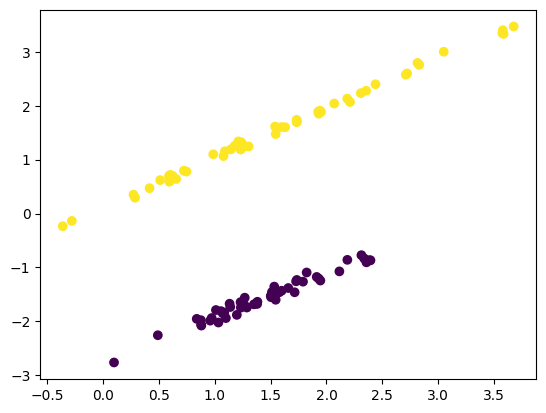

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# He Weight Initialization (for ReLU)

In [19]:
# Initialize a Sequential model
model = Sequential()

# Add a Dense layer with 10 neurons, ReLU activation, input dimension 2, and He-normal weight initialization
model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_normal'))

# Add another Dense layer with 10 neurons, ReLU activation, and He-normal weight initialization
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# Add another Dense layer with 10 neurons, ReLU activation, and He-normal weight initialization
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# Add another Dense layer with 10 neurons, ReLU activation, and He-normal weight initialization
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# Add a Dense output layer with 1 neuron, sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Display the summary of the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

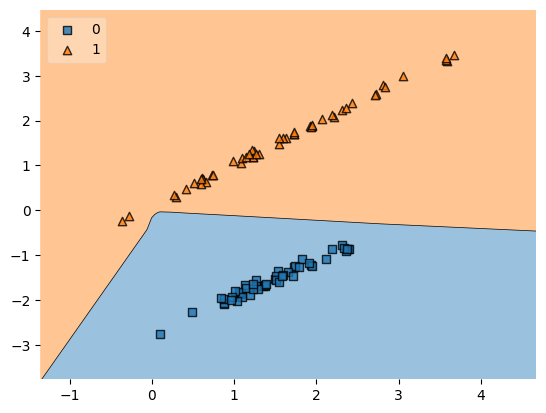

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Xavier / Glorat Weight Initialization Manually (For Tanh)

In [34]:
# Initialize the first layer weights with random values scaled by sqrt(1/2)
initial_weights[0] = np.random.randn(2, 10) * np.sqrt(1 / 2)

# Initialize the first layer biases with zeros
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

# Initialize the second layer weights with random values scaled by sqrt(1/10)
initial_weights[2] = np.random.randn(10, 10) * np.sqrt(1 / 10)

# Initialize the second layer biases with zeros
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

# Initialize the third layer weights with random values scaled by sqrt(1/10)
initial_weights[4] = np.random.randn(10, 10) * np.sqrt(1 / 10)

# Initialize the third layer biases with zeros
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

# Initialize the fourth layer weights with random values scaled by sqrt(1/10)
initial_weights[6] = np.random.randn(10, 10) * np.sqrt(1 / 10)

# Initialize the fourth layer biases with zeros
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

# Initialize the output layer weights with random values scaled by sqrt(1/10)
initial_weights[8] = np.random.randn(10, 1) * np.sqrt(1 / 10)

# Initialize the output layer biases with zeros
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [35]:
model.set_weights(initial_weights)

In [37]:
model.get_weights()[0]

array([[-0.82210916, -0.07303087, -0.46623182, -0.37040052, -0.4526513 ,
         0.09407217, -0.29376355,  0.03710913, -0.24162513,  0.68716395],
       [-1.1265842 ,  0.01324349, -0.09023751,  0.53831315,  0.4575332 ,
         0.12545124, -0.34266207, -1.2158511 ,  0.880034  , -0.6934121 ]],
      dtype=float32)

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.4625 - loss: 0.7014 - val_accuracy: 0.5500 - val_loss: 0.6863
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4664 - loss: 0.6858 - val_accuracy: 0.5500 - val_loss: 0.6769
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5211 - loss: 0.6667 - val_accuracy: 0.5500 - val_loss: 0.6686
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4664 - loss: 0.6692 - val_accuracy: 0.5500 - val_loss: 0.6601
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4781 - loss: 0.6547 - val_accuracy: 0.5500 - val_loss: 0.6513
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5133 - loss: 0.6400 - val_accuracy: 0.5500 - val_loss: 0.6413
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5133 - loss: 0.6315 - val_accuracy: 0.5500 - val_loss: 0.6303
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4781 - loss: 0.6231 - val_accuracy: 0.5500 - val_loss

In [40]:
model.get_weights()[0]

array([[-0.5787888 , -0.05254773, -0.64112025, -0.2666445 , -0.29097322,
         0.16713522, -0.01031279,  0.30594647, -0.08553151,  0.847702  ],
       [-1.3481299 ,  0.0336843 , -0.09219369,  0.64578253,  0.6385254 ,
         0.24791981, -0.58841974, -1.465045  ,  1.0388358 , -0.66031873]],
      dtype=float32)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

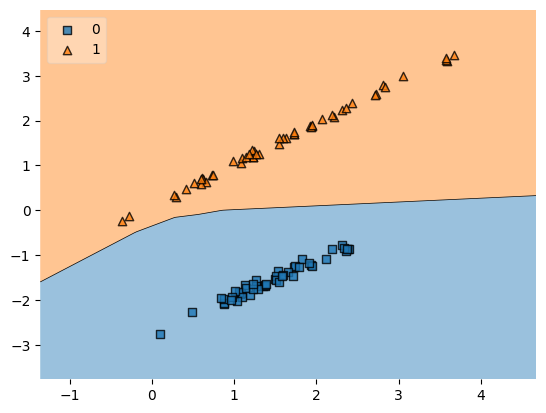

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)